In [87]:
import os
import pickle
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [88]:
DATA_DIR = 'C:/Users/Turbo/Desktop/char_data'
data = []
labels = []
cnt_temp = 0
num_of_dirty_data = 0
for dir_ in os.listdir(DATA_DIR):
    for sub_dir in os.listdir(os.path.join(DATA_DIR, dir_)):
        for nmp_file in os.listdir(os.path.join(DATA_DIR, dir_, sub_dir)):
            res = np.load(os.path.join(DATA_DIR, dir_, sub_dir, nmp_file))
            if(any(res)):
                data.append(res)
                labels.append(dir_)        
            else:
                num_of_dirty_data += 1

print(f'no. of dirty data: {num_of_dirty_data}')     




no. of dirty data: 357


In [89]:
import pandas as pd
df = pd.DataFrame(data) 
df['Labels']=labels
df

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,Labels
0,0.000000,0.302487,0.006233,0.190551,0.060984,0.096594,0.137305,0.069256,0.196997,0.079871,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ain
1,0.000000,0.269025,0.007506,0.161081,0.068323,0.074875,0.146607,0.057773,0.203202,0.072734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ain
2,0.000000,0.271068,0.005697,0.162536,0.065726,0.076954,0.143517,0.061240,0.198294,0.076850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ain
3,0.000000,0.276376,0.004670,0.163406,0.066133,0.075838,0.145489,0.060045,0.202315,0.075151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ain
4,0.000000,0.277798,0.004636,0.166244,0.063686,0.079522,0.141710,0.062644,0.198380,0.077288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99538,0.030011,0.395471,0.077115,0.338300,0.093167,0.264194,0.105289,0.210151,0.119008,0.161028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zain
99539,0.030011,0.395471,0.077115,0.338300,0.093167,0.264194,0.105289,0.210151,0.119008,0.161028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zain
99540,0.024910,0.397616,0.074209,0.336064,0.090071,0.258979,0.101729,0.203274,0.119129,0.156661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zain
99541,0.019610,0.406144,0.074081,0.343693,0.091320,0.265141,0.103423,0.206825,0.121690,0.161539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zain


In [90]:

le=LabelEncoder()
Y=le.fit_transform(df['Labels'])
df['Labels']=le.fit_transform(df['Labels'])
label_map = dict(zip(Y, labels))
label_map

{0: 'Ain',
 1: 'Alef',
 2: 'Beh',
 3: 'Dad',
 4: 'Dal',
 5: 'Feh',
 6: 'Ghain',
 7: 'Hah',
 8: 'Heh',
 9: 'Jeem',
 10: 'Kaf',
 11: 'Khah',
 12: 'Lam',
 13: 'Meem',
 14: 'Noon',
 15: 'Qaf',
 16: 'Reh',
 17: 'Sad',
 18: 'Seen',
 19: 'Sheen',
 20: 'Tah',
 21: 'Teh',
 22: 'Thal',
 23: 'Theh',
 24: 'Waw',
 25: 'Yeh',
 26: 'Zah',
 27: 'Zain'}

In [91]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
y = to_categorical(Y).astype(int)

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :42], y, test_size=0.2, shuffle=True)

In [99]:
x_train.shape

(79634, 42)

In [100]:
y_train.shape

(79634, 28)

In [101]:
import tensorflow as tf
class StopOnAccuracy(tf.keras.callbacks.Callback):
    def __init__(self, target_acc):
        self.target_acc = target_acc

    def on_epoch_end(self, epoch, logs=None):
        if logs['categorical_accuracy'] >= self.target_acc:
            print("\nReached target accuracy, stopping training...")
            self.model.stop_training = True

Epoch 1/700
2489/2489 [==============================] - 9s 3ms/step - loss: 0.3513 - categorical_accuracy: 0.8947
Epoch 2/700
2489/2489 [==============================] - 8s 3ms/step - loss: 0.0860 - categorical_accuracy: 0.9770
Epoch 3/700
2489/2489 [==============================] - 8s 3ms/step - loss: 0.0617 - categorical_accuracy: 0.9831
Epoch 4/700
2489/2489 [==============================] - 8s 3ms/step - loss: 0.0459 - categorical_accuracy: 0.9879
Epoch 5/700
2489/2489 [==============================] - 8s 3ms/step - loss: 0.0411 - categorical_accuracy: 0.9882
Epoch 6/700
2489/2489 [==============================] - 8s 3ms/step - loss: 0.0363 - categorical_accuracy: 0.9897
Epoch 7/700
2473/2489 [============================>.] - ETA: 0s - loss: 0.0314 - categorical_accuracy: 0.9910
Reached target accuracy, stopping training...
2489/2489 [==============================] - 8s 3ms/step - loss: 0.0313 - categorical_accuracy: 0.9911
Model: "sequential_23"
___________________________

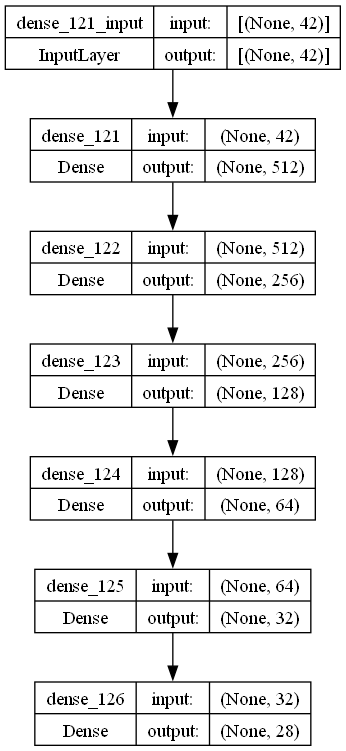

In [102]:
from tensorflow import keras
from keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.optimizers import Adam



model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(42,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))


model.add(Dense(len(df['Labels'].unique()), activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
stop_on_acc = StopOnAccuracy(0.99)  # Stop if validation accuracy reaches 99%
model.fit(x_train, y_train, epochs=700 ,callbacks=[stop_on_acc])
model.summary()

# Create a graphical representation of the model architecture
keras.utils.plot_model(model, to_file='model_architecture.png', show_shapes=True)

In [103]:
model.save('action2.h5')
model.load_weights('action2.h5')

C:\Users\Turbo\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [104]:
from keras.models import load_model


model = load_model("action2.h5")

In [107]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support

yhat = model.predict(x_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)


623/623 [==============================] - 1s 2ms/step


array([[[19205,     0],
        [    2,   702]],

       [[19142,     1],
        [    1,   765]],

       [[19187,     2],
        [   10,   710]],

       [[19195,    10],
        [    4,   700]],

       [[19181,     8],
        [   20,   700]],

       [[19186,     4],
        [    4,   715]],

       [[19225,     3],
        [    0,   681]],

       [[19187,    15],
        [   10,   697]],

       [[19156,     5],
        [    3,   745]],

       [[19203,    11],
        [    3,   692]],

       [[19201,     0],
        [    1,   707]],

       [[19179,     0],
        [   14,   716]],

       [[19220,     0],
        [    3,   686]],

       [[19196,     4],
        [    3,   706]],

       [[19178,     1],
        [    1,   729]],

       [[19177,     2],
        [    5,   725]],

       [[19159,    20],
        [    2,   728]],

       [[19134,     5],
        [    6,   764]],

       [[19238,     3],
        [    4,   664]],

       [[19172,     5],
        [    3,   729]],



In [108]:
LSTM_ACC= accuracy_score(ytrue, yhat)
print("Accuracy", LSTM_ACC)

Accuracy 0.9937214325179567
